## Training a facial recognition model by OpenCV

Let the OpenCV to tell you look like Beckham, Trump or Kim 

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. It is commonly used in the industry for facial recognition. In the following example, we are going to demonstrate how to build a model to identify David Beckham, Donald Trump and Kim Jong-Un by using OpenCV in Python. First, We have to google the pictures and rename the file name accordingly. In the example, for simplicity, I would assing 0 for Beckham, 1 for Trump and 2 for Kim. The  pictures for Beckham would be named as 0.0, 0.1, 0.2 and so on. 

After we prepared all the 15 pictures, we have to call the cascade "haarcascade_frontalface_default" to detect the frontal face of the images. 


In [1]:
import cv2
import os 
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
imagePath = 'C:\\Users\\Jonathan\\data analytics\\computer vision\\beckhamtrumpkim\\'

cascPath = 'C:\\Users\\Jonathan\\AppData\\Local\\Programs\\Python\\Python37\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml'
detector = cv2.CascadeClassifier(cascPath)

recognizer = cv2.face.LBPHFaceRecognizer_create()

cv2.__version__

'4.1.1'

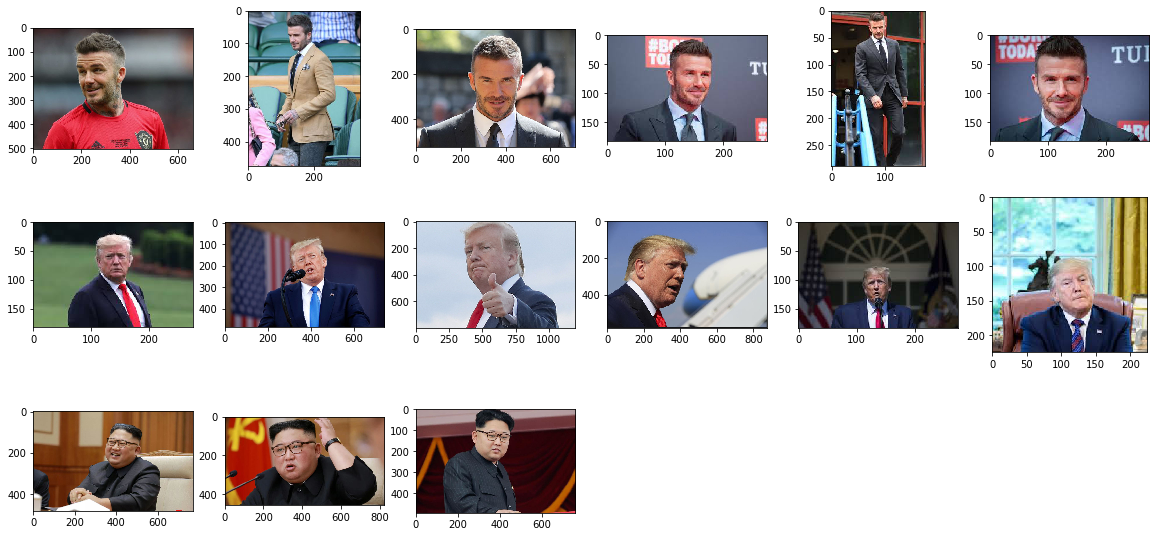

In [3]:

imagePath = 'C:\\Users\\Jonathan\\data analytics\\computer vision\\beckhamtrumpkim\\'

imagefulllist = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '1.0', '1.1', '1.2', '1.3', '1.4', '1.5'
                , '2.0', '2.1', '2.2']

plt.figure(figsize=(20, 20))
for count, item in enumerate(imagefulllist): 
    id = item.split(".")[0]
    #print(id)
    plt.subplot(6,6,count+1)
    filename = imagePath + item + '.jpg'
    image = imread(filename)
    #print(filename)
    plt.imshow(image)

Then we have to use the "detectMultiScale" to detect the frontal face of the image and we draw a rectagle on the faces detected. The facial detection algorithms begin by searching for human eyes, eyebrows, the mouth, nose, nostrils and the iris. Once the algorithm surmises that it has detected a facial region, additional tests are applied to validate whether it has detected a face. The facial detection is not a new technology, in fact it has been implemented widely in digital camera since 90s. 

Note the openCV by default reads images in BGR format. In fact, you can also view all color space available in OpenCV and use the cvtColor(image, flag) to fix this.

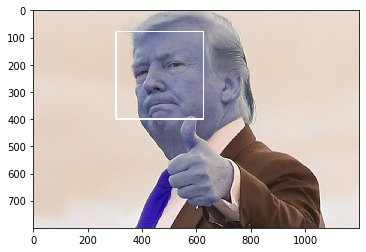

In [2]:
imgloc = imagePath+'1.2.JPG'
img1 = cv2.imread(imgloc)
faces = detector.detectMultiScale(img1) #OpenCV by default reads images in BGR format
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 255, 255), 3)

plt.imshow(img1, cmap='gray')
plt.show()


In [30]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_BGR2')] #Check color space

In [32]:
len(flags)
print(flags)

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12']


In some pictures the facial detection may not be able to detect all the faces correctly. The photo of Kim Jong-Un below has been detected 2 faces by mistake. There are multiple reasons for the mistake and we will discuss on the remedation in the future. 

number of faces = 2 


<Figure size 432x288 with 0 Axes>

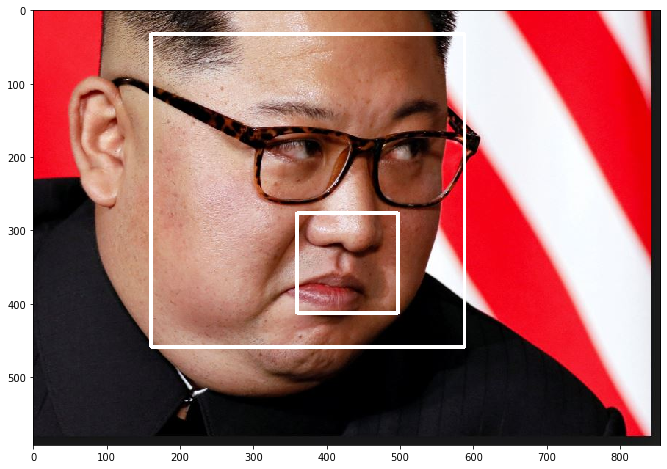

In [16]:
#using a function to replace detectMultiScale

def facedetection(test_img):
    faces = detector.detectMultiScale(test_img,scaleFactor=1.1, minNeighbors = 5)
    return(faces,test_img)


imgloc = "C:\\Users\\Jonathan\\data analytics\\computer vision\\facial_recognition xml\\prediction\\"+'2.7.JPG'
gray = cv2.imread(imgloc)
testface, testimage2 = facedetection(gray)
print('number of faces = {0} '.format(len(testface)))

for (x, y, w, h) in testface: 
    # Draw rectangle around the face
    cv2.rectangle(testimage2, (x, y), (x+w, y+h), (255, 255, 255), 3)

plt.clf()
plt.figure(figsize=(12,8))
testimage3 = cv2.cvtColor(testimage2,cv2.COLOR_BGR2RGB)
plt.imshow(testimage3)
plt.show()

Running the following codes to detect if there are multiple faces detected in each of the 15 pictures

15 faces, 15 id in total are detected

It means only 1 face detected for each picture. By transforming the detected faces into the training data by using numpy array function, now we have the all the faces data stored in the list "faces" and the all person id stored in list "id".

In [11]:
path = 'C:\\Users\\Jonathan\\data analytics\\computer vision\\beckhamtrumpkim'

def getImagesAndLabels(path):
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)] 
    faceSamples=[]
    ids = []
    for imagePath in imagePaths:
        PIL_img = Image.open(imagePath).convert('L') #Luminance  ==> greystyle
        img_numpy = np.array(PIL_img,'uint8')
        #print(PIL_img)
        #.show()
        #print(len(img_numpy)
        id = int(os.path.split(imagePath)[-1].split(".")[0])
        faces = detector.detectMultiScale(img_numpy)
        #print(id)
        #print(faces)
        if len(faces) > 1:
            print("The following image detect more than 1 face", imagePath)
        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)
            #print(ids)
            
    return faceSamples,ids
faces,ids = getImagesAndLabels(path)


print("{0} faces, {0} id in total are detected".format(len(faces), len(ids)))

15 faces, 15 id in total are detected


Alright. Everything is ready to train the data. I have saved the model to a permanent destination for future use. In this case the model saving is not necessary as the training sample is very small; However, it is worth doing if you have many training data. 

In [13]:
face_recognizer=cv2.face.LBPHFaceRecognizer_create()
face_recognizer.train(faces, np.array(ids))

In [14]:
def train_classifier(faces, faceID):
    face_recognizer=cv2.face.LBPHFaceRecognizer_create() #LBPHFaceRecognizer_create no such module
    face_recognizer.train(faces, np.array(faceID))
    return face_recognizer

# Save the model as trainer.yml
facerecognizer = train_classifier(faces, ids)
facerecognizer.save('C:\\Users\\Jonathan\\data analytics\\computer vision\\facial_recognition xml\\prediction\\bdktrainer.yml') # recognizer.save() worked on Mac, but not on Pi


The final step is to feed in new data for prediction purpose. Before doing it, I have created a name dictionary to convert the id to the person name for better illustration and a new function "puttext" to create textbox on the detected face. It is up to you to change the font size, color and style for the text. Check out more at the OpenCV documentation. 

Not bad. The OpenCV is able to recognise the person in the picture is David Beckham. 

number of faces = 1 
[[81 31 77 77]]
81 31 77 77


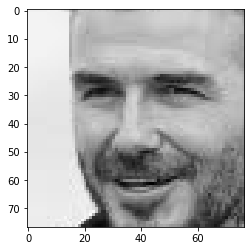

confidence: 107.29466572344991
label: 0
Beckham


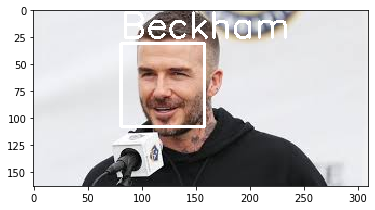

In [30]:
name = {0:"Beckham", 1:"Trump", 2:"Kim"}
imgloc = 'C:\\Users\\Jonathan\\data analytics\\computer vision\\facial_recognition xml\\prediction\\beckham5.jpg'
gray = cv2.imread(imgloc)
gray2 = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
#plt.imshow(gray2)
#plt.show()

grayimage2 = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
faces = detector.detectMultiScale(grayimage2,scaleFactor=1.2, minNeighbors = 2)

print('number of faces = {0} '.format(len(faces)))
#plt.imshow(gray)
#plt.show()


def put_text(test_img,text,x,y): 
    cv2.putText(test_img,text,(x,y),cv2.FONT_ITALIC,1.1,(255,255,255),2) #text, font size, font color( purple yellow), thickness

print(faces)

for face in faces:
    (x,y,w,h) = face
    print(x,y,w,h)
    roi_gray = grayimage2[y:y+h, x:x+h]
    plt.imshow(roi_gray, cmap='gray')
    plt.show()
    label, confidence = facerecognizer.predict(roi_gray)
    
    print("confidence:", confidence)
    print("label:", label)
    
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 2)
    predicted_name = name[label]
    print(predicted_name)
    put_text(gray, predicted_name,x,y-5) #put text 5 pixel higher than face
    
    gray = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
    
plt.imshow(gray)

Last, I try to feed the image of myself to let the OpenCV tell me who i looked like most out of the 3 men. Woh surprisingly, you may see the result below.


number of faces = 1 
109 112 121 121


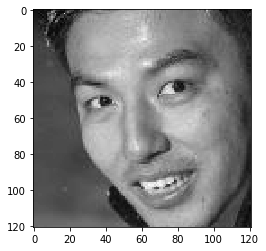

confidence: 82.59881439893637
label: 1
Trump


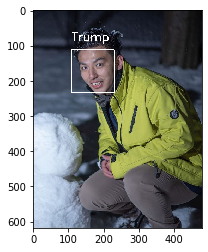

In [32]:
imgloc = 'C:\\Users\\Jonathan\\data analytics\\computer vision\\facial_recognition xml\\prediction\\myself.jpg'
gray = cv2.imread(imgloc)
gray2 = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)

grayimage2 = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
faces = detector.detectMultiScale(grayimage2,scaleFactor=1.2, minNeighbors = 2)

print('number of faces = {0} '.format(len(faces)))

for face in faces:
    (x,y,w,h) = face
    print(x,y,w,h)
    roi_gray = grayimage2[y:y+h, x:x+h]
    plt.imshow(roi_gray, cmap='gray')
    plt.show()
    label, confidence = facerecognizer.predict(roi_gray)
    
    print("confidence:", confidence)
    print("label:", label)
    
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 2)
    predicted_name = name[label]
    print(predicted_name)
    put_text(gray, predicted_name,x,y-25) #put text 25 pixel higher than face
    
    gray = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
    
plt.imshow(gray)

Conclusions

LBPH is one of most strightforward and handy facial recognition algoritium in Python and it produces a great result in a montonic grey scale image. However, as you may see in the earlier image, you may need to adjust the scaleFactor and the minNeighbors to minimize the error in the image
